In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import confusion_matrix, classification_report 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df[df.duplicated()].shape

(0, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
X=df.iloc[:,2:31].values
Y = df.iloc[:,1].values

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

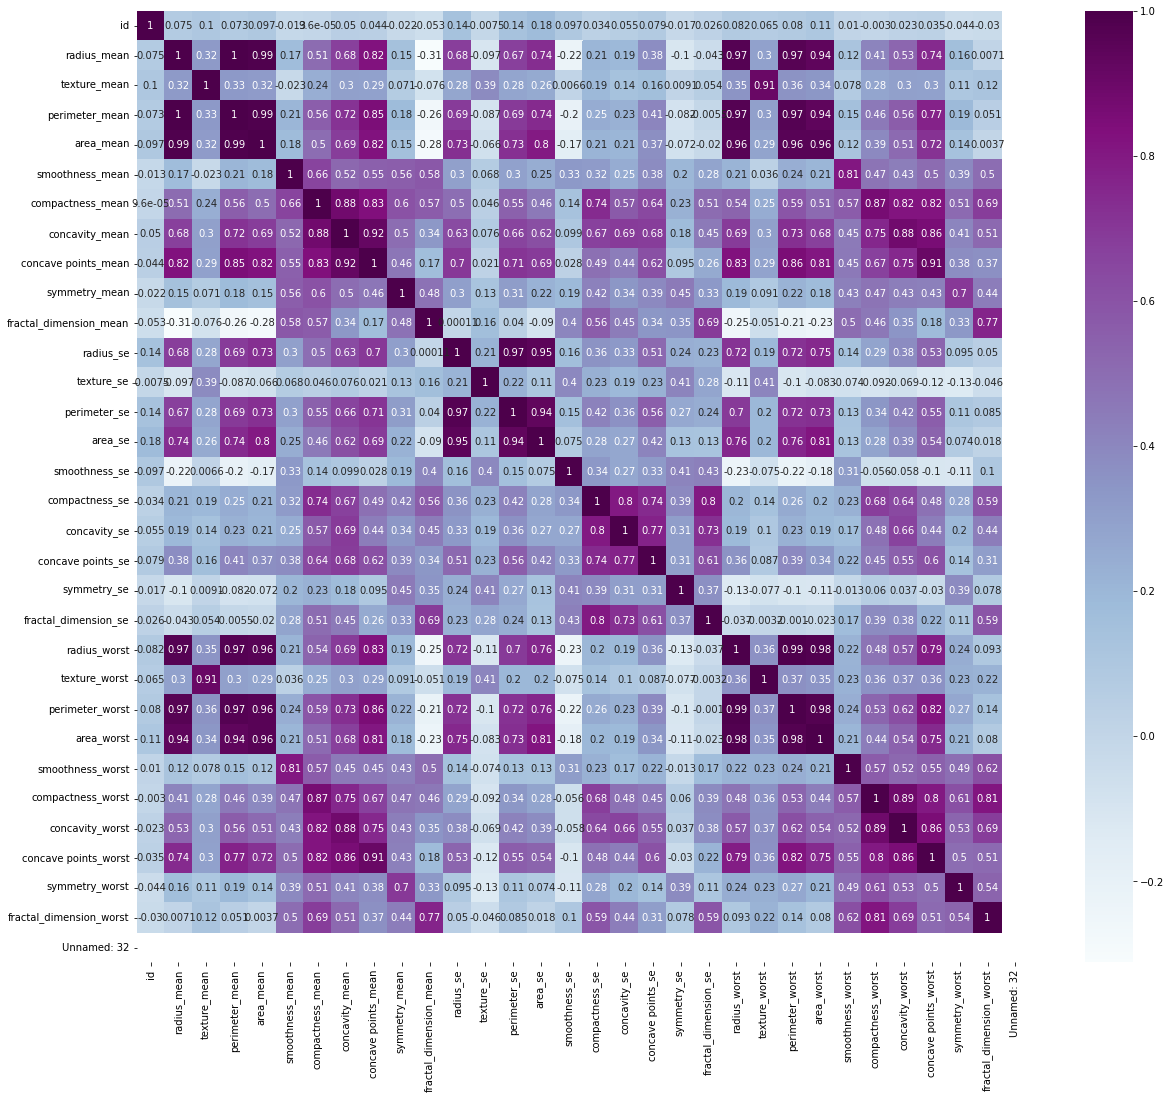

In [ ]:
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(20,17.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [ ]:
scaler = StandardScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X)) 
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)


In [ ]:
pca = PCA(n_components=0.95) 
x_pca = pca.fit_transform(X_scaled_drop) 
x_pca = pd. DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X. shape, "\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 29) 
After PCA, x_pca dataframe shape =  (569, 10)


In [ ]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

[0.42568246 0.16147852 0.10109357 0.07925267 0.0628492  0.05205102
 0.02118582 0.01836953 0.01571208 0.0123297 ]
0.9500045721682818


In [ ]:
print(x_pca.shape) 
print(Y.shape)

(569, 10)
(569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.25, random_state=0) 
svc = SVC() 
svc.fit(X_train, y_train) 
y_pred =svc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
print("Confusion matrix: \n", cm) 
report = classification_report(y_test, y_pred) 
print("Classification report: \n", report)

Confusion matrix: 
 [[89  1]
 [ 4 49]]
Classification report: 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        90
           M       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

